<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Предварительная-обработка" data-toc-modified-id="Предварительная-обработка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Предварительная обработка</a></span></li><li><span><a href="#Топ-10-городов-по-количеству-рейсов" data-toc-modified-id="Топ-10-городов-по-количеству-рейсов-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Топ-10 городов по количеству рейсов</a></span></li><li><span><a href="#Графики-и-выводы" data-toc-modified-id="Графики-и-выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Графики и выводы</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Описание проекта

Основная цель — выявить самые популярные модели самолетов и направления для перелетов в августе-сентябре 2018 года.  

Для анализа было предоставлено два датасета: один из них c информацией количестве рейсов по моделям самолетов в сентябре 2018 года, второй со сведениями о городах назначения и среднем количество рейсов, прибывающих в город ежедневно в августе в 2018 года.

## Предварительная обработка

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

query1 = pd.read_csv('/datasets/query_1.csv')
query3 = pd.read_csv('/datasets/query_3.csv')

In [2]:
display(query1)
display(query1.info())
query1.describe()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


None

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


In [3]:
display(query3)
display(query3.info())
query3.describe()

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


None

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


Типы данных в обеих таблицах выглядят нормально. Всего в двух таблицах четыре стобца, два из них текстовые (город и модель самолета), два — числовые (количество рейсов по моделям самолетов целочисленное, среднее количество рейсов — float). Пропусков в таблицах нет. 

## Топ-10 городов по количеству рейсов

In [4]:
# топ-10 городов по среднему количеству прибываюших рейсов в августе 2018

top10 = query3.groupby('city')[['average_flights']].sum().sort_values(
    by='average_flights', 
    ascending=False
    ).head(10).round(2)
top10

,average_flights
city,
Москва,129.77
Санкт-Петербург,31.16
Новосибирск,17.32
Красноярск,11.58
Екатеринбург,11.32
Ростов-на-Дону,10.19
Пермь,10.13
Брянск,10.00
Сочи,9.61


In [5]:
print(round(query3['average_flights'].mean(), 1), '- среднее количество рейсов в день по всем городам')
print(query3['average_flights'].median(), '- медианное количество рейсов в день по всем городам')

5.5 - среднее количество рейсов в день по всем городам
3.0 - медианное количество рейсов в день по всем городам


Москва по среднему количеству рейсов очевидно впереди, причем разница с Петербургом, идущим на втором месте более чем в 4 раза. Остальные города в топ-10 имеют уже гораздо меньшую разницу в количестве рейсов, между третьи и десятым местом разница меньше 2 раз.
При этом среднее количество рейсов в день среди всех городов практически в два раза выше медианного (в первую очередь из-за аномального показателя Москвы). Медиана в 3 рейса в день объяснима, но в 2021 году даже с учетом коронавируса и пандемии выглядит заниженной: многие города России с аэропортами зачастую имеют несколько ежедневных рейса в Москву и/или Петербург, а также несколько рейсов в другие города региона или ближайшего региона. Так, например, [аэропорт Уфы](http://www.airportufa.ru/scoreboard/arrival/), судя по имеющимся данным на август 2018 года, имеет около 6 рейсов в день в среднем, однако сейчас Уфа принимает более 50 рейсов ежедневно. Или [Череповец](https://rasp.yandex.ru/station/9623264/?date=2021-08-15&time=all) с 2 рейсами в день в 2018 году, тогда как сейчас Череповец принимает не менее 7-8 рейсов в день.

## Графики и выводы

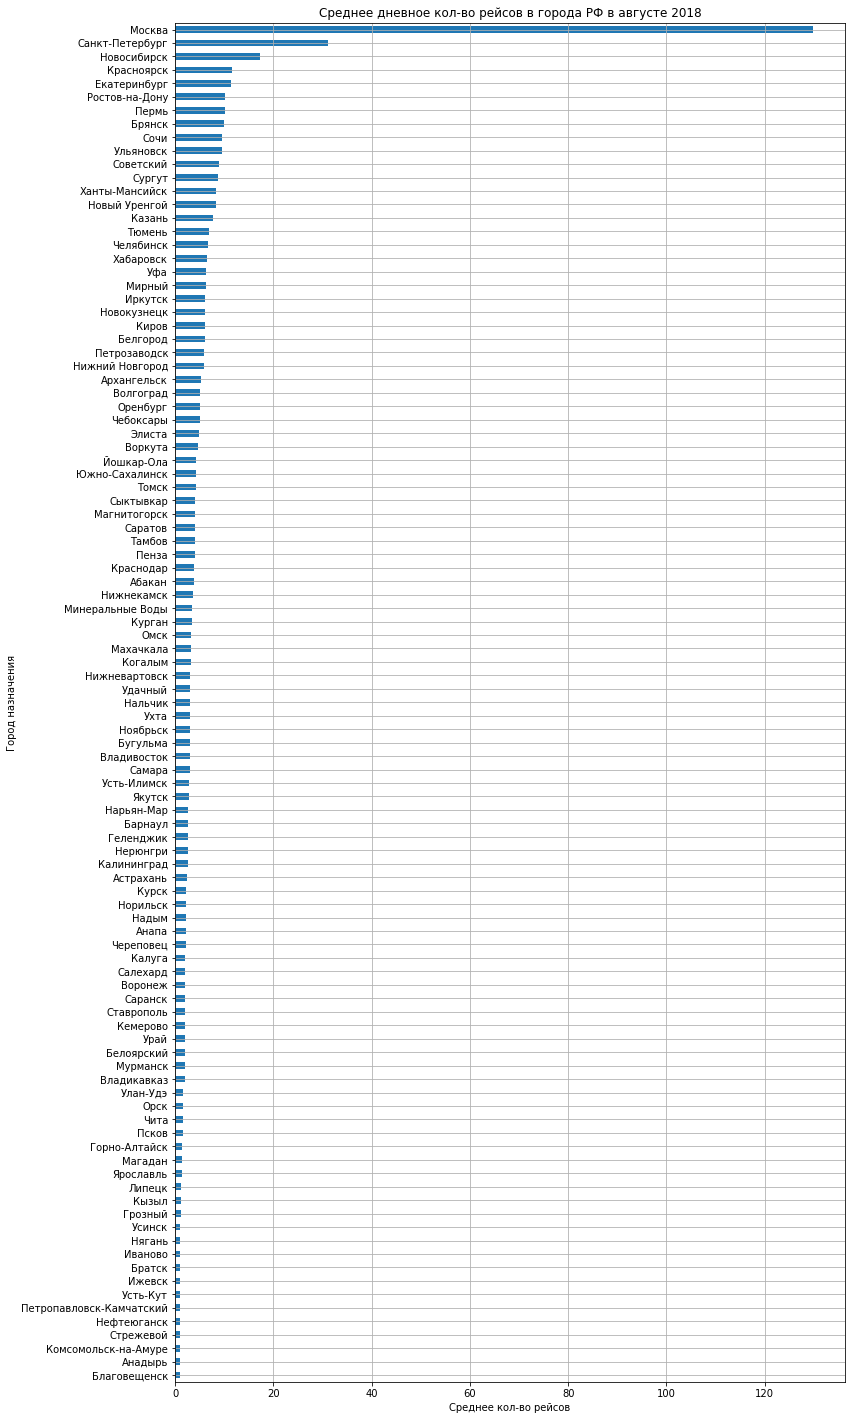

In [6]:
query3_sorted = query3.sort_values(by = ['average_flights'], ascending = True)
query3_sorted.plot(
    kind='barh', figsize= (12, 25), x='city', 
    title='Среднее дневное кол-во рейсов в города РФ в августе 2018',
    legend=False, grid=True, rot=0);
plt.ylabel('Город назначения')
plt.xlabel('Среднее кол-во рейсов');

<a id='cell1'><a/>

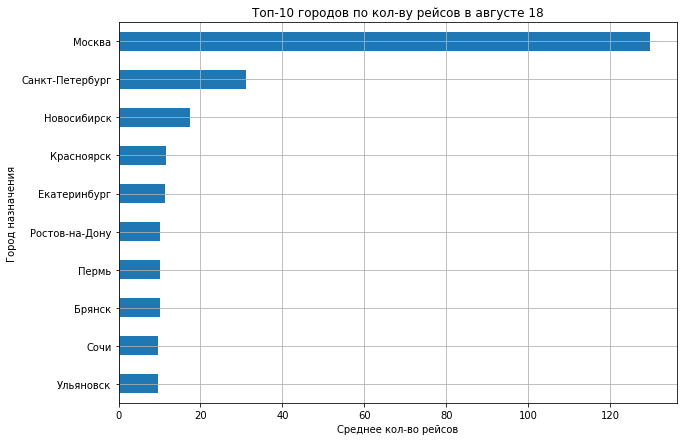

In [8]:
top10_sorted = top10.sort_values(by = ['average_flights'], ascending = True)
top10_sorted.plot(kind='barh', figsize=(10,7), title='Топ-10 городов по кол-ву рейсов в августе 18', grid=True, legend=False);
plt.xlabel('Среднее кол-во рейсов')
plt.ylabel('Город назначения');

Самым популярным городом назначения для рейсов внутри страны, безусловно, является Москва. Среднее количество рейсов в другие города существенно меньше. На графике ["Среднее дневное кол-во рейсов по городам"](#cell1) хорошо видно, как выделяется Москва, а следом за ней, в гораздо меньшем масштабе, но все равно достаточно сильно относительно остальных городов — Санкт-Петербург. Количество рейсов в среднем в других городах выглядит равномерным в промежутке от 1 до 5 рейсов в день, за исключением единичных случаев, где среднее количество рейсов превосходит 10 в день. Таких городов всего пять кроме "двух столиц" и все они кроме Новосибирска имеют показатели около 10-11 рейсов в день в среднем:

1. Новосибирск - 17.32
2. Красноярск - 11.58
3. Екатеринбург - 11.32
4. Ростов-на-Дону - 10.2
5. Пермь - 10.13

В целом, самыми популярными направлениями в 2018 году являются Москва-Симферополь, Москва-Сочи, Москва-Краснодар, Москва-Санкт-Петербург, по данным сервиса путешествий [Туту.ру](https://www.aviaport.ru/digest/2019/01/09/570489.html). Однако в сентябре 2018 года в нашей базе практически полностью другие лидеры, так как кроме Москвы и Петербурга остальные популярные направления различаются. Это может быть связано как с разницей в конкретном месяце (сентябрь все еще популярный месяц для путешествий и перелетов, но пора отпусков у большинства граждан уже прошла, поэтому летние направления теряют популярность), так и различиями в методологии и источниках сбора данных. 

Таким образом, отрыв Москвы и Петербурга вряд ли может кого-то удивить, но вот медиана по количеству рейсов в день равная 3  выглядит несколько странно. Из 2021 года, даже учитывая негативное влияние пандемии на путешествия и передвижения граждан, представленные в таблицах данные кажутся заниженными. Большинство городов из списка с показателями 1-3 рейса в день в среднем в августе 2018 года, в 2021 году имеют значительно большие показатели прибывающих рейсов. 
Если отбросить в сторону влияние пандемии, то объяснить это можно тем, что рынок авиаперевозок в России сильно вырос за три года, однако разница все же выглядит слишком значительной, чтобы списать ее на рост рынка. Вероятно, дело в источнике данных, и, возможно они просто неполные, поэтому произошел такой перекос и по моделям самолетов, и по количеству рейсов.

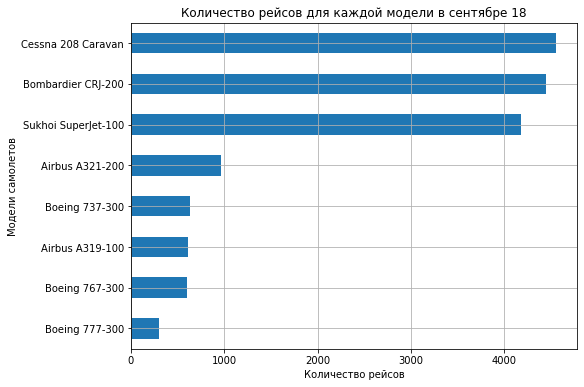

In [9]:
query1_sorted = query1.sort_values(by = ['flights_amount'], ascending = True)
query1_sorted.plot(
    kind='barh', 
    figsize=(8,6), 
    title='Количество рейсов для каждой модели в сентябре 18', 
    x='model', rot=0, grid=True, legend=False);
plt.xlabel('Количество рейсов');
plt.ylabel('Модели самолетов');

На графике ["Количество рейсов для каждой модели"](#cell2) можно наблюдать, что совокупное количество рейсов на самолетах обоих производителей Airbus и Boeing меньше, чем количество рейсов по одной модели из списка Bombardier, Cessna или Sukhoi Superjet. Это выглядит несколько странно, так как самолеты компаний Airbus и Boeing в целом более популярны в мире, а конкретно модели Airbus A319 и A321 особенно. По данным [исследования РБК](https://www.rbc.ru/research/society/27/11/2015/564de81a9a79472dab71463a) "*На чем летает Россия*" за 2013 год как в мире, так и в России, самолеты Airbus и Boeing занимали около 60-70% всего авиапарка экспуатируемых судов, при этом самыми популярными моделями являются как раз модели самолетов из наших данных: на первом месте по распространенности серия Airbus 320 (A320, A319 и А321), на втором месте — семейство Boeing 737.

Также, согласно данным отчета [World Airlines Census](https://www.flightglobal.com/download?ac=67051) всего в 2018 году, европейскими авиакомпаниями использовалось 548 самолетов Airbus A319 и 505 A321, тогда как, например, Bombardier CRJ-200, занимающий второе место по количеству выполненных рейсов в сентябре 2018 года в нашей базе, состоял во флоте европейских авиакомпаний суммарно в количестве 58 штук, из которых большая часть это региональные авиаперевозчики в РФ. Руслайн, ЮВТ АЭРО, Северсталь, ИрАэро и Ямал владеют 44 самолетами этой модели. В Европе эта модель самолетов не пользуется таким спросом больше ни в одной стране. 

Лидер по количеству перелетов в сентябре 2018 года — Cessna 208 Caravan, выполнил 4557 рейсов в сентябре 2018 года по данным имеющейся базы. Это одномоторный самолет на 9 пассажиров, вероятно, чаще всего использовался для коммерческих частных перевозок. Самолет состоит по флоте у нескольких маленьких авиакомпаний в РФ, например: [АэроГео](http://www.ag24.ru/air-fleet#Samolet-Cessna-208B-Grand-Caravan) и [Авиакомпания СКОЛ](https://skol.ru/fleet-aircrafts/sessna-208b-grand-caravan/)
Эта модель самолетов также используется для пассажирских перелетов малой протяженности в сложных условиях. Так, Авиакомпания "Татарстан" [приобрела](https://ria.ru/20130430/935355638.html) данный самолет в 2020 году именно для таких целей. 
В качестве эксперимента я также проверил полеты в России на сайте [flightradar24](https://www.flightradar24.com/) за последние дни (1-3 июля) и не обнаружил ни одного полета над Россией самолетами Cessna 208. 

Однако, объяснить такое количество рейсов одними пассажирскими перевозками в локальных авиакомпаниях сложно. Чтобы получить 4557 рейсов  в месяц нужно выполнять 151 рейс на таких самолетах в день. Судя по имеющимся данным, в 2018 году такие самолеты были лишь у двух региональных небольших авиакомпаний суммарно в количестве не более 6 самолетов, поэтому представить такую загруженность у них сложно. Вероятно, большая часть это все же частные перевозки и коммерческие бизнес-рейсы.

Cамолет Sukhoi Superjet 100 в Европе помимо российских компаний состоит во флоте только у компании Brussels Airlines (5 самолетов) и CityJet (2 самолета). Остальные 86 самолетов принадлежат российским авиаперевозчикам. С таким распространением большое число перелетов более понятно — это один из самых популярных вариантов для перелетов по России. По данным производителя SSJ100, компании [«Гражданские самолеты Сухого»](https://www.vedomosti.ru/business/articles/2019/04/22/799896-rossiiskogo-ssj100) в 2018 году в пользовании российских авиакомпаний было 109 самолетов. Однако налет этих моделей на тот момент был все еще существенно ниже иностранных конкурентов: 3,6 часов в сутки у SSJ100, тогда как у Airbus 320 и Boeing 737-800 в среднем по 10 и 11 ч в сутки соответственно. Поэтому лидерство других производителей самолетов в представленной базе выглядит несколько странно и возможно, действительно, связано с особенностью выгрузки данных (или источником данных), где в конечную базу попали неполные или сильно отличающиеся данные за 2018 год. 

## Общий вывод

По итогам изучения данных, можно сделать предсказуемый вывод, что **самым популярным направлением для перелетов в России является Москва**. Конечно, отчасти это связано с популярностью Москвы как города, однако часть рейсов прилетает в столицу для дальнейших перелетов в другие точки назначения, используя аэропорты Москвы как пересадочные станции. 

129 рейсов в среднем за сутки прибывают в Москву, тогда как Санкт-Петербург, идущий на втором месте, в среднем принимает 31 рейс: разница между 1 и 2 местом более 4 раз, при этом разница между остальными городами уже не так ощутима. Между 3 и 10 местом разница меньше 2 раз: 17 рейсов в Новосибирске против 9.5 в Ульяновске.

**Количество рейсов в среднем в других городах распространено достаточно равномерно: от 1 до 5 рейсов в сутки**. Преобладающее большинство городов в списке попадет в этот промежуток. При этом, в топ-10 самых популярных направлений все одно южное направление - Сочи, это может говорить о том, что в сентябре пик популярности типичных летних направлений спадает, в связи с началом учебного года и завершением общепринятого сезона отпусков в летние месяцы.

При этом важно отметить, что **медианное значение прибывающих рейсов в августе 2018 года — 3 рейса в день выглядит несколько заниженным; в 2021 году эти показатели для большинства городов из списка выше**. Сильно выросшие за три года цифры могут говорить о том, что рынок авиаперевозок в России сильно вырос за это время, однако если учесть негативное влияние пандемии на путешествия и перелеты, то версия со значительным ростом рынка все же маловероятна. Возможно разница связана с тем, что имеющиеся данные просто неполные, из-за чего данные так различаются.   

Что касается популярных моделей самолетов, то и здесь ситуация не совсем однозначна. Судя по имеющимся таблицам, **количество рейсов на самолетах обоих лидеров рынка Airbus и Boeing в сумме меньше (3 097 рейсов всего), чем количество рейсов на моделях гораздо менее популярных производителей** Bombardier (4446 рейсов), Cessna (4557 рейсов) или Sukhoi Superjet (4185 рейсов), при том, что производители Airbus и Boeing наиболее популярны как в мире, так и в России, занимая 60-70% всего авиапарка экспуатируемых судов. Тогда как, например, Cessna 208, лидер по количеству перелетов в таблице по данным на сентябрь 2018 года — это маленький 9 местный самолет, который состоит во флоте только у пары небольших региональных авиакомпаний в России в количестве не более 6 штук, а в июле 2021 года над Россией не было ни одного зарегистрированного полета на этой модели.   

Объяснить такую популярность Cessna пассажирскими перевозками двух небольших российских авиакомпаний достаточно сложно. Возможно имеет место техническая ошибка в данных или значительная часть рейсов этой модели это частные перевозки и коммерческие бизнес-рейсы. 